In [1]:
using Distributions
using LaTeXStrings
using Plots
using Printf

In [2]:
sample_size = 10000
expected_value = lambda_ = 4.5
n_samples = 1:100:10000

1:100:9901

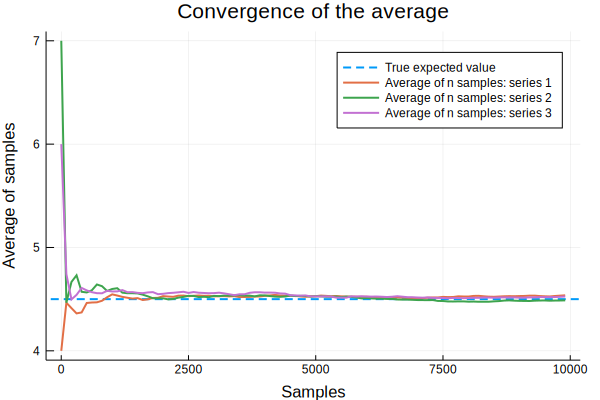

In [3]:
plt = hline([expected_value],
    linestyle = :dash, linewidth = 2, 
    title = "Convergence of the average",
    label = "True expected value",
    xlabel = "Samples", ylabel = "Average of samples")
for k in 1:3
    samples = rand.(Poisson(lambda_), sample_size)
    partial_average = [mean(samples[1:i]) for i in n_samples]
    plot!(n_samples, partial_average, 
        linewidth = 2, 
        label = @sprintf("Average of n samples: series %.0f", k))
end
plt

In [4]:
n_y = 250
n_array = 1000:2500:50000
d_n_results = zeros(length(n_array))
lambda_ = 4.5
expected_value = lambda_

function d_n(n)
    z = rand.(Poisson(lambda_), repeat([n], n_y))
    average_z = mean.(z)
    sqrt(mean((average_z .- expected_value) .^ 2))
end

for (i, n) in enumerate(n_array)
   d_n_results[i] = d_n(n)
end

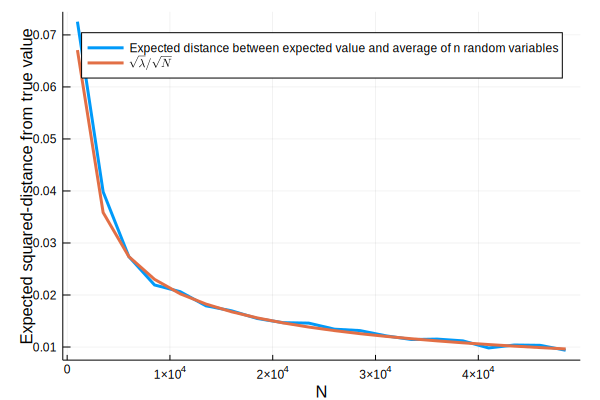

In [5]:
plot(n_array, d_n_results, linewidth = 3, 
    xlabel = "N", ylabel = "Expected squared-distance from true value",
    label = "Expected distance between expected value and average of n random variables")
plot!(n_array, sqrt.(expected_value ./ n_array), linewidth = 3, 
    label = L"\sqrt{\lambda}/\sqrt{N}")

In [6]:
n = 10000
xs = rand.(Exponential(2), n)
mean(xs .> 10)

0.0084